<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/ANN_Multi_Layer_Keras_Number_Writing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

print(train_images.shape) #Hiển thị số giá trị
print(train_labels.shape)

(60000, 28, 28)
(60000,)


số này là:  3


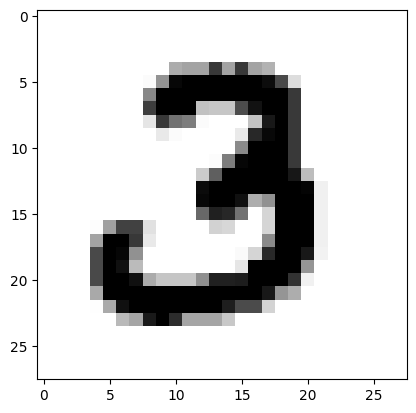

In [ ]:
#Hiển thị 1 giá trị bất kỳ

hinh = train_images[242]
plt.imshow(hinh, cmap= plt.cm.binary)
plt.show
print('số này là: ', train_labels[242])


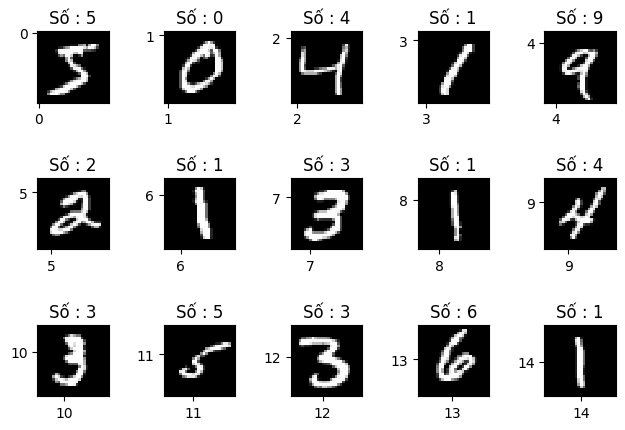

In [ ]:
#Hiển thị cả 10 số
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation = 'none')
  plt.title('Số : {}'.format(train_labels[i]))
  plt.xticks([i])
  plt.yticks([i])

In [ ]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.serialization import activation

In [ ]:
#Tạo 1 mạng có 28x28 input và 10 output
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))  #Hàm truyền relu tạo 512 noron trong 1 lop mạng ẩn 28*28,: chỉ có 1 cột dữ liệu
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X = test_images
Y = test_labels

In [ ]:
#Chuyển 60000 bức ảnh kích thước 28*28 thành 1 hàng ngang

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
print(train_images.shape)

(60000, 784)


In [ ]:
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255
print(test_images.shape)

(10000, 784)


In [ ]:
from keras.utils import to_categorical #one hot enccoding giatri mau tung diem anh tu thap phan duoi dang 10 bit
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)
print(train_labels.shape)

(60000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs =10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Độ chính xác trên tập kiểm tra:',test_acc)
print('Hàm mất mát trên tập kiểm tra:',test_loss)

Epoch 1/10
469/469 [==============================] - 5s 9ms/step - loss: 0.2662 - accuracy: 0.9238
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1074 - accuracy: 0.9684
Epoch 3/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0710 - accuracy: 0.9787
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0517 - accuracy: 0.9842
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0379 - accuracy: 0.9887
Epoch 6/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0289 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0222 - accuracy: 0.9935
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0167 - accuracy: 0.9953
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0129 - accuracy: 0.9967
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0629 - accuracy: 0.

In [ ]:
model.save('model1.h5')

số này là:  6


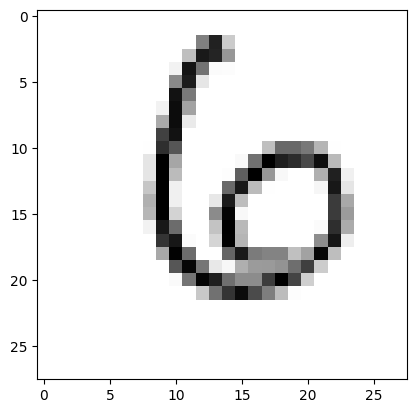

In [ ]:
X[100]
plt.imshow(X[100], cmap= plt.cm.binary)
plt.show
print('số này là: ', Y[100])

In [ ]:
x_pred=X[100].reshape(1,28*28)
x_pred=x_pred.astype('float32')/255
y_pred = model.predict(x_pred)
print(y_pred)


1/1 [==============================] - 0s 21ms/step
[[8.0982772e-07 4.0085958e-08 1.1006678e-07 6.6177890e-11 1.5721416e-07
  4.8844851e-07 9.9999821e-01 4.4165802e-10 2.5147344e-07 1.1240438e-10]]


In [ ]:
np.argmax(model.predict(x_pred),axis=1)

1/1 [==============================] - 0s 30ms/step


array([6])

Hình này là:  5


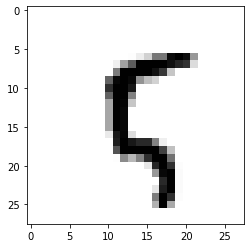

In [ ]:
sa = x_train[100]
plt.imshow(sa, cmap= plt.cm.binary)
plt.show
print('Hình này là: ', y_train[100])